# Social study of scientific python
## Web of Science Analysis

Download data from the WOS
- [scientific computing] All articles in the Web of Science with "scientific programming" or "scientific computing" in it
- [python] All articles in the Web of Science with "Python" AND NOT "snake", "reptile"

In [15]:
import emilientools
from emilientools import io
import os as os
import pandas as pd
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline

###  "Python" articles

In [31]:
corpus = emilientools.io.WosCorpus()
corpus.add_wos("wos-python",directory=True)
print("There are {number} articles in the corpus".format(number=len(corpus.corpus)))

There are 1691 articles in the corpus


## Visualisation

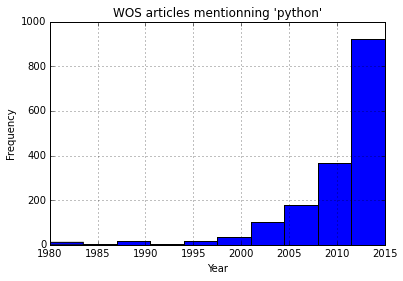

In [32]:
python = pd.Series([int(i["year"]) for i in corpus.corpus if i["year"]!="0000"])
python.hist()
plt.title("WOS articles mentionning 'python'")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.savefig("hist-wospython.png")

**Citations**

In [4]:
s = pd.Series([j for i in corpus.corpus for j in i["bibliography_clean"]]).value_counts()

In [8]:
s[0:30]

oliphant te 2007 comput sci eng                                                       81
hunter jd 2007 comput sci eng                                                         74
jones e. 2001 scipy open source sc                                                    63
perez f 2007 comput sci eng                                                           47
cock pja 2009 bioinformatics                                                          37
berman hm 2000 nucleic acids res                                                      36
humphrey w 1996 j mol graph model                                                     26
li h 2009 bioinformatics                                                              26
pedregosa f 2011 j mach learn res                                                     26
altschul sf 1997 nucleic acids res                                                    25
behnel s 2011 comput sci eng                                                          24
oliphant t.e. 2006 gu

In [48]:
#Create a network of cocitations
filter_articles = [i for i in dict(s) if s[i]>10]
G = nx.Graph()
for i in corpus.corpus:
    G.add_node(i["id"],Label=i["year"]+" "+i["title"][0:30],weight=1,type="article")
    for j in [u for u in i["bibliography_clean"] if u in filter_articles]:
        if j in G.node:
            G.node[j]["weight"]+=1
        else:
            G.add_node(j,Label=j,weight=1,type="ref")
        if () in G.edges():
            G[i["id"]][j]["weight"]+=1
        else:
            G.add_edge(i["id"],j,weight=1)

In [50]:
# Use Gephi to visualize the network
nx.write_graphml(G,"nw-python-08082015.graphml")

The analyse shows that there is a cluster linked to python as an animal, and it seems no easy way to clean it for the moment
- a solution would be to use keywords to filter
- an other solution is to exlude automaticaly all the field of zoology

### Keywords

In [3]:
s = pd.Series([j for i in corpus.corpus for j in i["keywords1"]]).value_counts()

In [4]:
s[0:30]

python                         159
software                        33
methods: data analysis          18
performance                     17
algorithms                      16
simulation                      16
open source                     16
methods: numerical              13
molecular dynamics              13
gis                             13
cosmic microwave background     12
optimization                    11
automation                      11
specific dynamic action         11
graphical user interface        10
bioinformatics                  10
languages                       10
c plus                          10
object-oriented programming     10
design                          10
database                         9
data analysis                    9
machine learning                 9
image processing                 8
scripting                        8
open-source                      7
methods: statistical             7
gpu                              7
open-source software

### "Scientific computing" articles

In [33]:
corpus = emilientools.io.WosCorpus()
corpus.add_wos("wos-sc",directory=True)
print("There are {number} articles in the corpus".format(number=len(corpus.corpus)))

There are 1778 articles in the corpus


### Visualisation

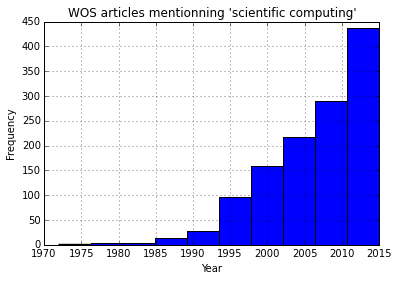

In [34]:
sc = pd.Series([int(i["year"]) for i in corpus.corpus if i["year"]!="0000"])
sc.hist()
plt.title("WOS articles mentionning 'scientific computing'")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.savefig("hist-wossc.png")

In [37]:
s = pd.Series([j for i in corpus.corpus for j in i["bibliography_clean"]]).value_counts()

In [38]:
s[0:40]

golub g 1996 matrix computations                                  32
dongarra jj 1990 acm t math software                              26
barrett r. 1994 templates solution l                              25
anderson e. 1999 lapack users guide                               24
lawson c. l. 1979 acm transactions on mathematical software       24
dean j 2008 commun acm                                            24
saad y 1986 siam j sci stat comp                                  19
foster i 1997 int j supercomput ap                                19
dongarra jj 1988 acm t math software                              18
balay s 1997 modern software tools for scientific computing       18
whaley rc 2001 parallel comput                                    17
saad y. 2003 iterative methods sp                                 17
foster i 2001 int j high perform c                                17
foster ian 1998 grid blueprint new c                              15
valiant lg 1990 commun acm        

In [39]:
s = pd.Series([j.strip() for i in corpus.corpus for j in i["keywords2"]]).value_counts()
s[0:30]

systems                      58
algorithm                    53
algorithms                   41
equations                    31
software                     27
performance                  25
model                        25
simulation                   22
parallel                     22
simulations                  20
optimization                 19
implementation               17
system                       16
models                       14
framework                    14
flow                         13
design                       13
approximation                12
networks                     11
generation                   11
computation                  11
set                          10
matrices                     10
matrix                       10
architectures                 9
navier-stokes equations       9
architecture                  9
graphs                        8
environment                   8
graphics processing units     8
dtype: int64

In [43]:
#Create a network of cocitations
filter_articles = [i for i in dict(s) if s[i]>1]
G = nx.Graph()
for i in corpus.corpus:
    G.add_node(i["id"],Label=i["year"]+" "+i["title"][0:30],weight=1,type="article")
    for j in [u for u in i["bibliography_clean"] if u in filter_articles]:
        if j in G.node:
            G.node[j]["weight"]+=1
        else:
            G.add_node(j,Label=j,weight=1,type="ref")
        if () in G.edges():
            G[i["id"]][j]["weight"]+=1
        else:
            G.add_edge(i["id"],j,weight=1)

In [44]:
# Use Gephi to visualize the network
nx.write_graphml(G,"nw-sc-09082015.graphml")